**1. Changing the number of Gray Level:**

Saving img_2.jpeg to img_2.jpeg


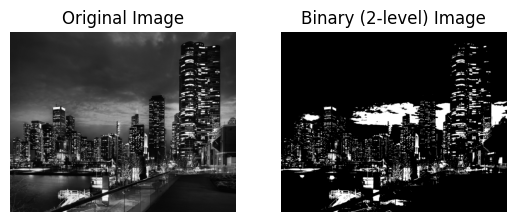

In [ ]:
import cv2
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

img = cv2.imread('img_2.jpeg', cv2.IMREAD_GRAYSCALE)

_, bw_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Binary (2-level) Image")
plt.imshow(bw_img, cmap="gray")
plt.axis("off")

plt.show()


**2. Reducing the Spatial Resolution**

Saving img_2.jpeg to img_2 (6).jpeg


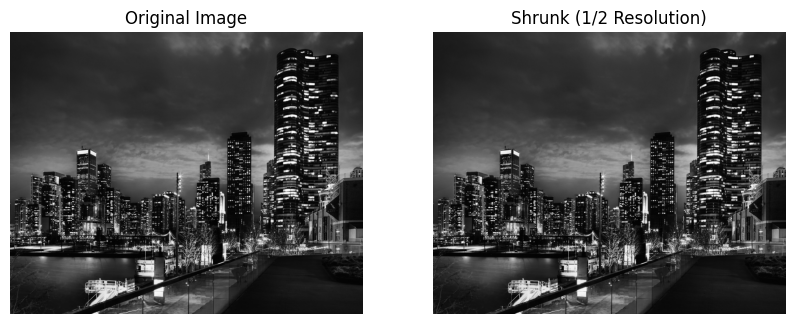

In [ ]:
import cv2
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

img = cv2.imread('img_2.jpeg')

if len(img.shape) == 3:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
    gray = img

shrunk = gray[::2, ::2]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(shrunk, cmap='gray')
plt.axis('off')
plt.title('Shrunk (1/2 Resolution)')

plt.show()

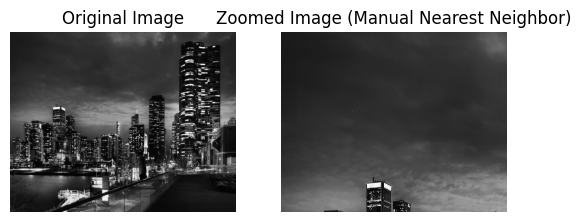

In [ ]:
  import cv2
  import numpy as np
  import matplotlib.pyplot as plt

  img = cv2.imread('img_2.jpeg', cv2.IMREAD_GRAYSCALE)

  r, c = img.shape

  zoomed = np.zeros((r*2, c*2), dtype=np.uint8)

  for i in range(r):
      for j in range(c):
        zoomed[4*i:4*i+4 , 4*j:4*j+4] = img[i,j]

  plt.figure()
  plt.subplot(1, 2, 1)
  plt.imshow(img, cmap='gray')
  plt.title('Original Image')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(zoomed, cmap='gray')
  plt.title('Zoomed Image (Manual Nearest Neighbor)')
  plt.axis('off')

  plt.show()

**3. Image Enhancement in Spatial Domain – Basic Grey Level Transformations**


3.1	Linear Transformations

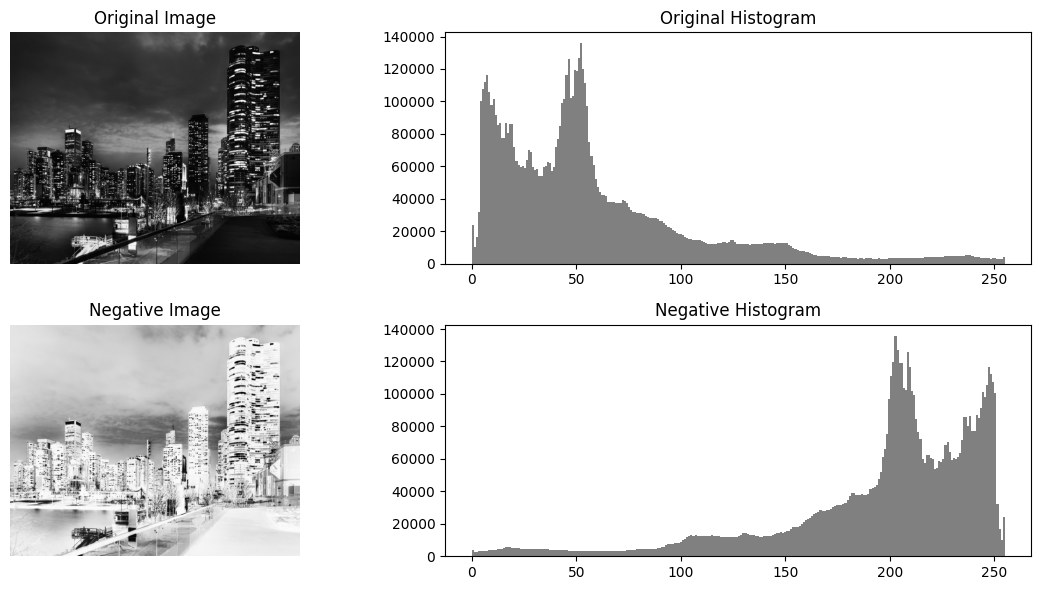

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img_2.jpeg', cv2.IMREAD_GRAYSCALE)

neg = 255 - img

plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.hist(img.ravel(), bins=256, range=(0,255), color='gray')
plt.title('Original Histogram')

plt.subplot(2,2,3)
plt.imshow(neg, cmap='gray')
plt.title('Negative Image')
plt.axis('off')

plt.subplot(2,2,4)
plt.hist(neg.ravel(), bins=256, range=(0,255), color='gray')
plt.title('Negative Histogram')

plt.tight_layout()
plt.show()

3.2	Logarithmic Transformations

/tmp/ipython-input-1936821545.py:23: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 255], color='gray')
/tmp/ipython-input-1936821545.py:32: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(log_img.ravel(), 256, [0, 255], color='gray')


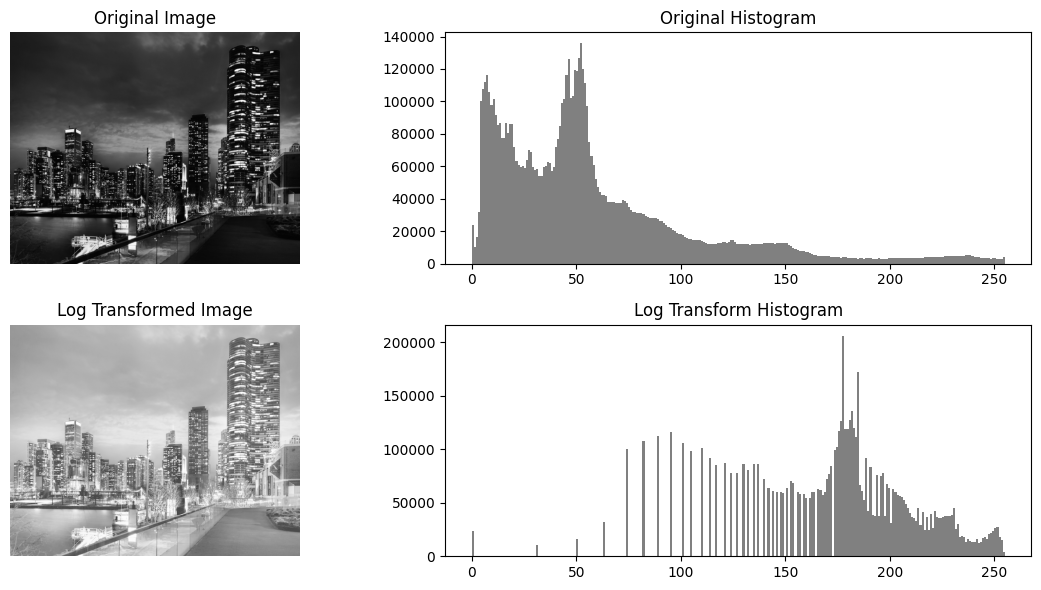

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read grayscale image
img = cv2.imread('img_2.jpeg', cv2.IMREAD_GRAYSCALE)

# Convert to float and apply log transform
img_float = img.astype(float)
c = 255 / np.log(1 + np.max(img_float))
log_img = c * np.log(1 + img_float)
log_img = np.array(log_img, dtype=np.uint8)

# Plot images and histograms
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(img.ravel(), 256, [0, 255], color='gray')
plt.title('Original Histogram')

plt.subplot(2, 2, 3)
plt.imshow(log_img, cmap='gray')
plt.title('Log Transformed Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.hist(log_img.ravel(), 256, [0, 255], color='gray')
plt.title('Log Transform Histogram')

plt.tight_layout()
plt.show()


3.3	Power-Law (Gamma) Transformations

/tmp/ipython-input-3515732834.py:27: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 255], color='gray')
/tmp/ipython-input-3515732834.py:38: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(power_img.ravel(), 256, [0, 255], color='gray')


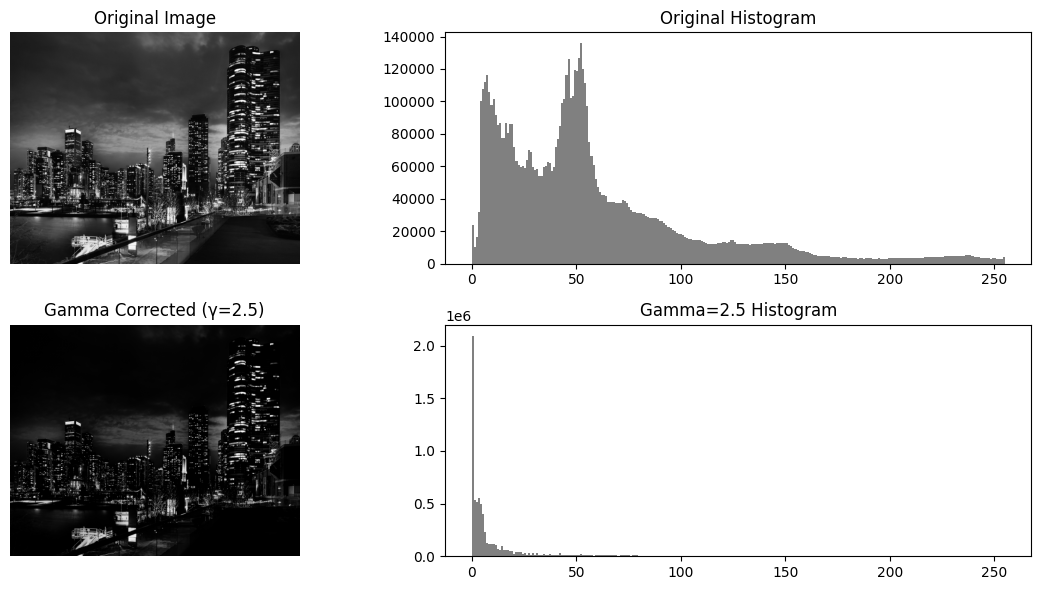

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read grayscale image
img = cv2.imread('img_2.jpeg', cv2.IMREAD_GRAYSCALE)

# Normalize to [0,1]
r = img / 255.0

# Apply gamma correction
gamma = 2.5  # try values between 0.4 and 2.5
power_img = np.power(r, gamma)
power_img = np.uint8(power_img * 255)

# Plot
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Original Histogram
plt.subplot(2, 2, 2)
plt.hist(img.ravel(), 256, [0, 255], color='gray')
plt.title('Original Histogram')

# Gamma Corrected Image
plt.subplot(2, 2, 3)
plt.imshow(power_img, cmap='gray')
plt.title(f'Gamma Corrected (γ={gamma})')
plt.axis('off')

# Gamma Corrected Histogram
plt.subplot(2, 2, 4)
plt.hist(power_img.ravel(), 256, [0, 255], color='gray')
plt.title(f'Gamma={gamma} Histogram')

plt.tight_layout()
plt.show()
